In [3]:
#from google.colab import files
#myfiles = files.upload()

Saving lasvegas.csv to lasvegas.csv


google colab만의 파일

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('lasvegas.csv')

In [6]:
df.head()

,LVR,REF,INSUR,RATE,AMOUNT,CREDIT,TERM,ARM,DELINQUENT
0,80.0,0,1,6.355,1.5760,532,30,1,0
1,89.0,1,1,6.875,3.1595,703,30,1,0
2,80.0,1,1,7.080,1.7600,648,30,1,0
3,80.0,0,0,12.855,1.9680,599,30,1,1
4,70.0,1,0,5.760,1.8620,626,30,1,0


In [10]:
y = df['DELINQUENT']
X = df.drop('DELINQUENT',axis=1)

In [ ]:
'''
DELINQUENT = 1 (대출 만기일 이후, 90일 이내에 상환되지 않은 경우: 연체), 0 (그렇지 않은 경우)
LVR = 자산 대비 대출의 비율
REF = 1 (대출이 재융자로 이루어진 경우), 0 (그렇지 않은 경우)
INSUR = 1 (해당 대출이 주택담보대출 보험에 가입된 경우), 0 (그렇지 않은 경우)
RATE = 해당 대출의 대출시점 기준 최초 이자율
AMOUNT = 해당 대출의 액수
CREDIT = 해당 대출을 실행한 사람의 신용 점수
TERM = 해당 대출의 만기까지 실행 기간
ARM = 1 (해당 대출이 변동 금리 상품인 경우), 0 (고정 금리인 경우)
'''

'\nDELINQUENT = 1 (대출 만기일 이후, 90일 이내에 상환되지 않은 경우: 연체), 0 (그렇지 않은 경우)\nLVR = 자산 대비 대출의 비율\nREF = 1 (대출이 재융자로 이루어진 경우), 0 (그렇지 않은 경우)\nINSUR = 1 (해당 대출이 주택담보대출 보험에 가입된 경우), 0 (그렇지 않은 경우)\nRATE = 해당 대출의 대출시점 기준 최초 이자율\nAMOUNT = 해당 대출의 액수\nCREDIT = 해당 대출을 실행한 사람의 신용 점수\nTERM = 해당 대출의 만기까지 실행 기간\nARM = 1 (해당 대출이 변동 금리 상품인 경우), 0 (고정 금리인 경우)\n'

### Linear Probability Model

In [11]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression #numerical optimization이 마음대로 가능해서 powerful
import warnings
warnings.filterwarnings("ignore")
#split : train set, validation set, test set

In [12]:
train, test = train_test_split(df, test_size = 0.2, random_state = 131)
train, validation = train_test_split(train, test_size = 0.25, random_state = 211)

In [13]:
test.shape

(200, 9)

In [14]:
X = df.drop(['DELINQUENT'], axis=1)
y = df['DELINQUENT']
y_train = train['DELINQUENT']
x_train = train.drop(['DELINQUENT'], axis = 1)
y_val = validation['DELINQUENT']
x_val = validation.drop(['DELINQUENT'], axis = 1)
y_test = test['DELINQUENT']
x_test = test.drop(['DELINQUENT'], axis = 1)
#DELINQUENT만 설명변수이므로

In [15]:
# verification
X_cons = sm.add_constant(x_train)
ver = sm.OLS(y_train, X_cons).fit()
print(ver.summary())

                            OLS Regression Results                            
Dep. Variable:             DELINQUENT   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     38.93
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           8.74e-50
Time:                        03:28:38   Log-Likelihood:                -192.30
No. Observations:                 600   AIC:                             402.6
Df Residuals:                     591   BIC:                             442.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4812      0.292      1.648      0.1

In [16]:
lpm = LinearRegression()
lpm.fit(x_train, y_train)

LinearRegression()

In [17]:
print(lpm.intercept_)
print(lpm.coef_)
#장점 : 편리한 문법

0.48122881215879687
[ 1.86194773e-03 -4.87932282e-02 -5.05783387e-01  4.77662042e-02
  2.67200560e-02 -2.31706344e-04 -1.41172406e-02  1.44275719e-01]


목적 : 수익성 증대.

지금 하는 것 : 오분류 최소화(accuracy 극대화)

In [20]:
result = pd.DataFrame(lpm.predict(x_val), columns=['pred_prob'])
result.head()
#cutoff 찾기 - 확률 -라니요? 이게 linear probability model의 특징.

,pred_prob
0,0.142151
1,-0.115958
2,0.638820
3,0.322288
4,0.092191


<Axes: ylabel='Frequency'>

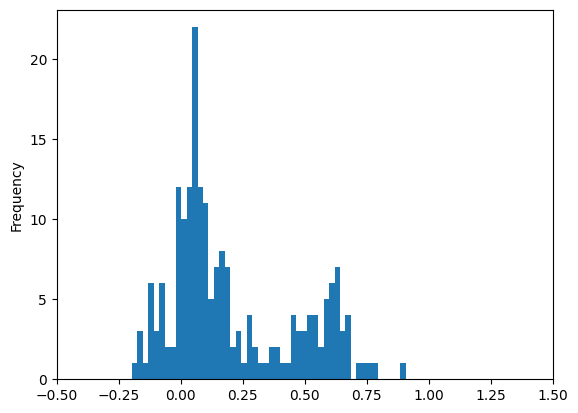

In [26]:
result.pred_prob.plot(kind='hist',bins=50, xlim=([-0.5,1.5]))
#경곗값의 후보군? 어떻게 찾음... 복잡. grid 짜서 해결함.

In [27]:
from sklearn.metrics import roc_curve, confusion_matrix, auc

In [28]:
fpr, tpr, threshold = roc_curve(y_val, result['pred_prob'])
#roc_auc = auc(fpr,tpr)

In [30]:
print(threshold)
#해당 값 이상이면 연체, 이하이면 yhat = 0

[ 1.906566    0.906566    0.77418591  0.76061653  0.67546939  0.66335431
  0.6555468   0.63882007  0.63708841  0.63046222  0.61702674  0.60616461
  0.60471402  0.59447199  0.58833143  0.57683208  0.57315005  0.55579926
  0.53173446  0.53059441  0.52751921  0.5271825   0.48689397  0.48501267
  0.48283593  0.45537271  0.43678143  0.27246234  0.27022092  0.22286762
  0.20948948  0.19685642  0.19315575  0.15021514  0.14707896  0.12592474
  0.11529927 -0.19804542]


In [31]:
roc_result = pd.DataFrame([fpr, tpr, threshold], index=['fpr','tpr','threshold']).T
roc_result

,fpr,tpr,threshold
0,0.000000,0.000000,1.906566
1,0.005988,0.000000,0.906566
2,0.005988,0.030303,0.774186
3,0.011976,0.030303,0.760617
4,0.011976,0.151515,0.675469
5,0.029940,0.151515,0.663354
6,0.029940,0.181818,0.655547
7,0.041916,0.181818,0.638820
8,0.041916,0.212121,0.637088
9,0.065868,0.212121,0.630462


In [32]:
# 경계값 기준은 연구목적에 맞게 짜면 됩니다.
# 여기서는 (1-fpr)+tpr 극대화하는 경계값을 찾습니다.

roc_result['best']=(1-roc_result['fpr']) + roc_result['tpr']
roc_result.head()
#목적함수? 알아서 만들 것. 국채금리를 고려한다든지....

,fpr,tpr,threshold,best
0,0.000000,0.000000,1.906566,1.000000
1,0.005988,0.000000,0.906566,0.994012
2,0.005988,0.030303,0.774186,1.024315
3,0.011976,0.030303,0.760617,1.018327
4,0.011976,0.151515,0.675469,1.139539


In [37]:
optimal_threshold = roc_result.threshold[roc_result.best.idxmax()]
optimal_threshold
#idxmax : 극댓값

0.4367814275750985

In [41]:
result_test = pd.DataFrame(lpm.predict(x_test), columns = ['pred_prob'])
result_test.head()

,pred_prob
0,0.103036
1,0.405443
2,0.098827
3,-0.057371
4,0.054121


In [42]:
result_test['y_hat'] = np.where(result_test.pred_prob >= optimal_threshold, 1, 0)#r ifelse()와 유사!
result_test

,pred_prob,y_hat
0,0.103036,0
1,0.405443,0
2,0.098827,0
3,-0.057371,0
4,0.054121,0
...,...,...
195,0.121644,0
196,0.046853,0
197,0.059040,0
198,-0.046915,0


In [43]:
confusion = confusion_matrix(y_test, result_test['y_hat'])
confusion

array([[148,  16],
       [  8,  28]])

In [44]:
accuracy = (148+28)/200
accuracy

0.88

In [45]:
tn,fp,fn,tp = confusion_matrix(y_test, result_test.y_hat).ravel()#revel() : 1차원으로 펴기

In [46]:
(tn+tp)/(tn+fp+fn+tp)
#accuracy

0.88

In [47]:
tp/(tp+fn)
#sen

0.7777777777777778

In [48]:
tp/(tp+fp)
#sensitivity

0.6363636363636364

### Logistic Regression

In [ ]:
logit_1 = sm.Logit(y_train, X_cons).fit()
print(logit_1.summary())
#해석하려면? e^b는 odds ratio가 됨.

Optimization terminated successfully.
         Current function value: 0.348677
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             DELINQUENT   No. Observations:                  600
Model:                          Logit   Df Residuals:                      591
Method:                           MLE   Df Model:                            8
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.3329
Time:                        13:01:06   Log-Likelihood:                -209.21
converged:                       True   LL-Null:                       -313.59
Covariance Type:            nonrobust   LLR p-value:                 9.025e-41
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4099      2.651     -0.155      0.877      -5.605       4.785
LVR            0.0154      0.

In [ ]:
logit_2 = LogisticRegression()
logit_2.fit(x_train, y_train)
#기본 form : Logistic Ridge

LogisticRegression()

In [ ]:
print(logit_2.intercept_)
print(logit_2.coef_)

[-0.04903765]
[[ 2.02091329e-02 -3.70055488e-01 -2.96416992e+00  3.41950062e-01
   2.44963103e-01 -1.77669614e-03 -1.18738813e-01  5.70636592e-01]]


In [ ]:
logit_3 = LogisticRegression(fit_intercept = True, penalty = 'none')
logit_3.fit(x_train, y_train)
#sklearn에서는 기본 페널티가 L2임

LogisticRegression(penalty='none')

In [ ]:
print(logit_3.intercept_)
print(logit_3.coef_)

[-0.08044314]
[[ 1.70643531e-02 -6.68783130e-01 -3.19371770e+00  4.08964700e-01
   2.34900404e-01 -2.19289955e-03 -1.28749759e-01  1.28975862e+00]]


In [ ]:
logit_4 = LogisticRegression(fit_intercept = True, penalty = 'none', solver = 'newton-cg')
logit_4.fit(x_train, y_train)
#sklearn에서는 기본 최적화가 newton-rapson 아님

LogisticRegression(penalty='none', solver='newton-cg')

In [ ]:
print(logit_4.intercept_)
print(logit_4.coef_)

[-0.40987993]
[[ 1.54439058e-02 -4.25225428e-01 -3.18699445e+00  4.16060960e-01
   2.11770302e-01 -1.45836277e-03 -1.44086664e-01  1.62517630e+00]]


In [ ]:
result_logit = pd.DataFrame(, columns=['pred_prob'])
result_logit.head()

문턱값 정하기 : 확률 계산과는 다른 과정